# Hacktiv8 Python for Data Science - Sesi 7

Sesi 7:
    
- Basic Visualization

## Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_can = pd.read_excel("dataset/Canada.xlsx", sheet_name = "Canada by Citizenship", skiprows = range(20), skipfooter = 2)

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [5]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

In [6]:
df_can.shape

(195, 43)

In [7]:
#Menghapus index
df_can.drop(["AREA", "REG", "DEV", "Type", "Coverage"], axis=1, inplace = True)

In [8]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [9]:
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [10]:
df_can["Total"] = df_can.sum(axis=1)

In [11]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [12]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [13]:
df_can[["Country", 2000, 2001, 2002, 2003]]

,Country,2000,2001,2002,2003
0,Afghanistan,3326,4067,3697,3479
1,Albania,1816,1602,1021,853
2,Algeria,2867,3418,3406,3072
3,American Samoa,0,0,0,0
4,Andorra,0,1,0,2
...,...,...,...,...,...
190,Viet Nam,1803,2117,2291,1713
191,Western Sahara,0,0,0,0
192,Yemen,122,181,171,113
193,Zambia,39,78,50,46


In [14]:
df_can.set_index("Country", inplace = True)

In [15]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [16]:
df_can.loc["China"]

Continent                  Asia
Region             Eastern Asia
DevName      Developing regions
1980                       5123
1981                       6682
1982                       3308
1983                       1863
1984                       1527
1985                       1816
1986                       1960
1987                       2643
1988                       2758
1989                       4323
1990                       8076
1991                      14255
1992                      10846
1993                       9817
1994                      13128
1995                      14398
1996                      19415
1997                      20475
1998                      21049
1999                      30069
2000                      35529
2001                      36434
2002                      31961
2003                      36439
2004                      36619
2005                      42584
2006                      33518
2007                      27642
2008    

In [17]:
df_can.loc["Indonesia"]

Continent                  Asia
Region       South-Eastern Asia
DevName      Developing regions
1980                        186
1981                        178
1982                        252
1983                        115
1984                        123
1985                        100
1986                        127
1987                        213
1988                        270
1989                        260
1990                        227
1991                        252
1992                        243
1993                        278
1994                        262
1995                        205
1996                        231
1997                        166
1998                        165
1999                        525
2000                       1138
2001                        907
2002                        709
2003                        515
2004                        552
2005                        632
2006                        613
2007                        657
2008    

In [18]:
df_can.loc["Indonesia", 2012]

395

In [19]:
df_can.columns = list(map(str, df_can.columns))

In [20]:
years = list(map(str, range(1980, 2014)))

In [21]:
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


## Data Visualization

In [22]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [24]:
mpl.style.use(["ggplot"])

In [25]:
haiti = df_can.loc["Haiti", years]

In [26]:
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

## Line Plot

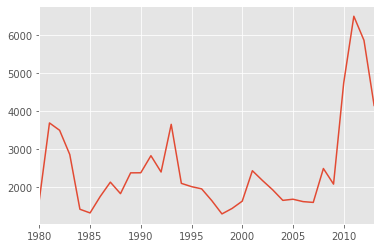

In [27]:
haiti.plot()

In [28]:
haiti.index = haiti.index.map(int)

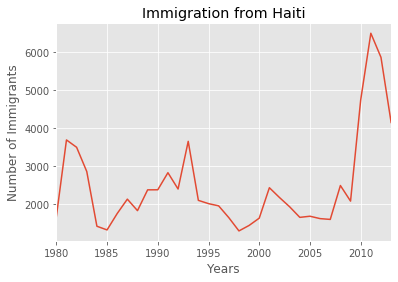

In [29]:
haiti.plot(kind = "line")

#Menambahkan title
plt.title("Immigration from Haiti")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")

plt.show()

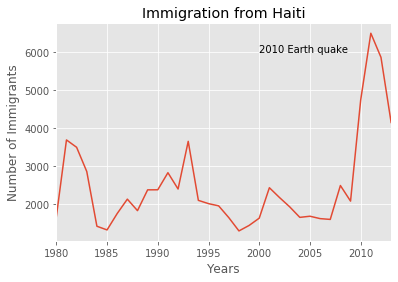

In [30]:
haiti.plot(kind = "line")

#Menambahkan title
plt.title("Immigration from Haiti")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")

#Syntax: plt.text(x, y, label)
plt.text(2000, 6000, "2010 Earth quake")

plt.show()

In [31]:
China_India = df_can.loc[["China", "India"], years]

In [32]:
China_India

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


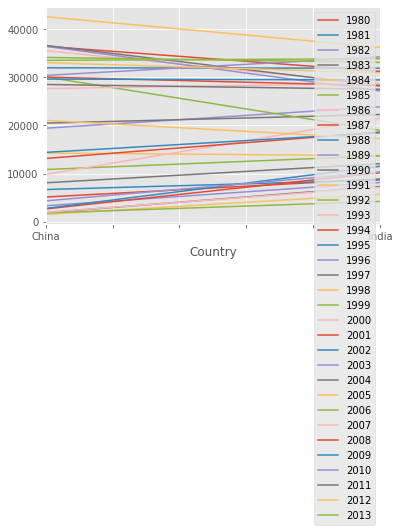

In [33]:
China_India.plot()

In [34]:
China_India.transpose()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


In [35]:
df_CI = China_India.transpose()

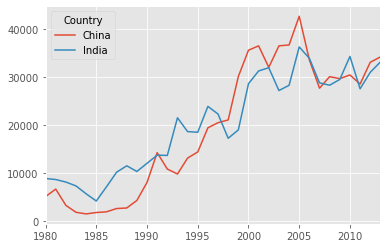

In [36]:
df_CI.plot()

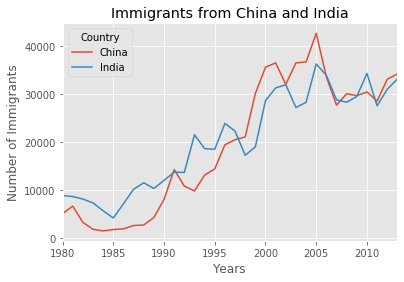

In [37]:
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [38]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

In [39]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [40]:
df_top5 = df_can.head(5)

In [41]:
df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [42]:
df_top5 = df_top5[years]. transpose()

In [43]:
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


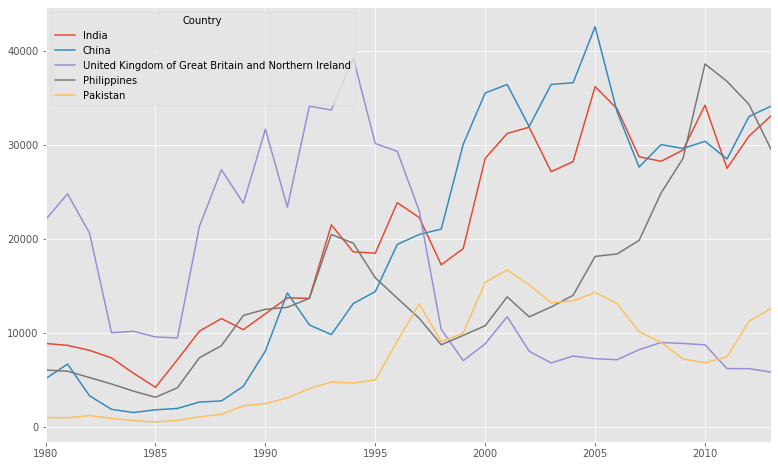

In [44]:
df_top5.plot(kind = "line", figsize =(13,8))

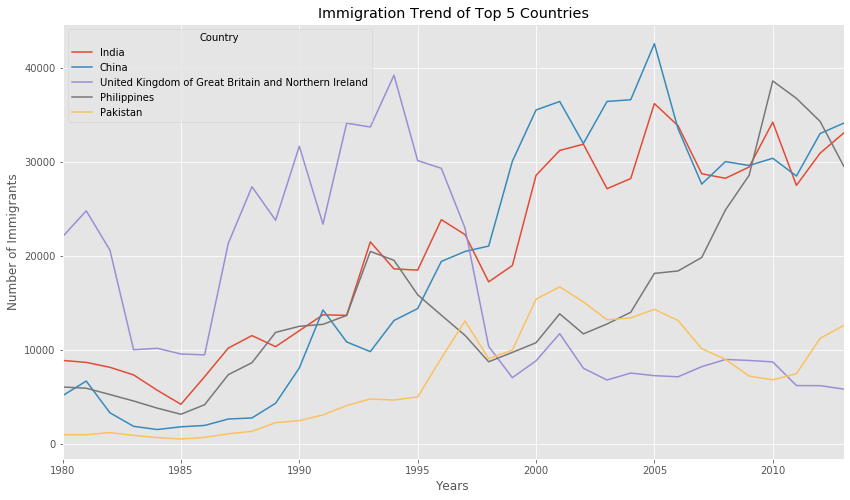

In [45]:
df_top5.plot(kind='line', figsize=(14, 8))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Area Plot

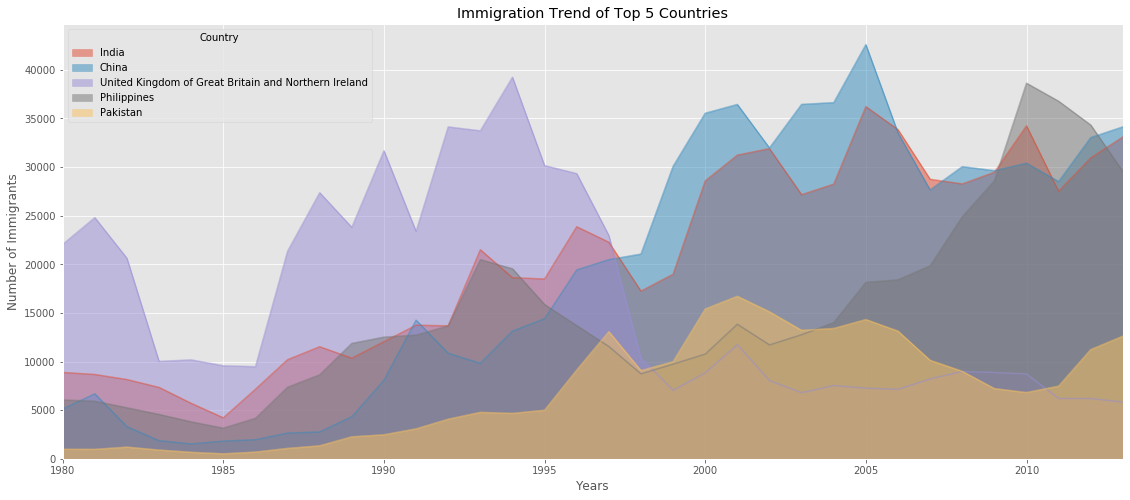

In [46]:
df_top5.plot(kind="area", 
             figsize = (19,8), 
             stacked = False,
             alpha = 0.5)

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Histograms

In [47]:
df_can["2013"].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [48]:
np.histogram(df_can["2013"])

(array([178,  11,   1,   2,   0,   0,   0,   0,   1,   2]),
 array([    0. ,  3412.9,  6825.8, 10238.7, 13651.6, 17064.5, 20477.4,
        23890.3, 27303.2, 30716.1, 34129. ]))

In [49]:
count, bin_edges = np.histogram(df_can["2013"])

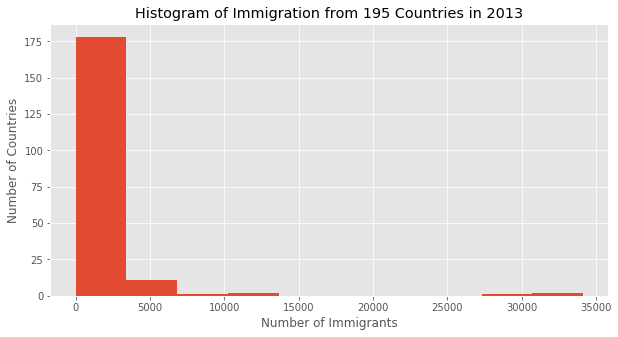

In [50]:
df_can["2013"].plot(kind="hist",
                   figsize=(10,5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

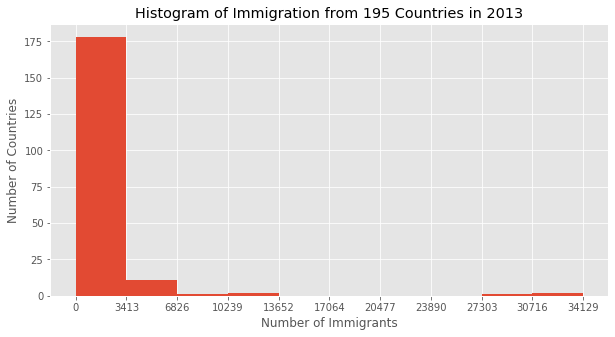

In [51]:
df_can["2013"].plot(kind="hist",
                    figsize=(10,5),
                    xticks = bin_edges)

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In [52]:
df_can.loc[["Denmark", "Norway", "Sweden"], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


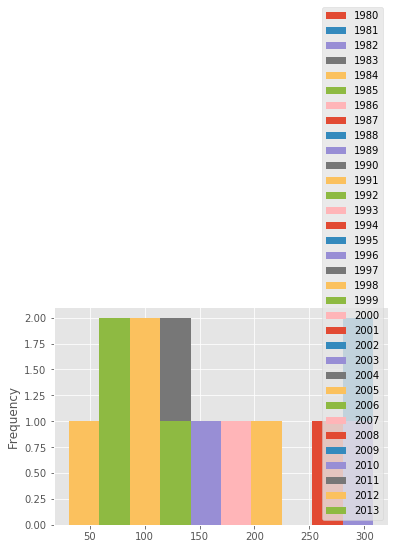

In [53]:
df_can.loc[["Denmark", "Norway", "Sweden"], years].plot(kind="hist")

In [54]:
df_t = df_can.loc[["Denmark", "Norway", "Sweden"], years].transpose()

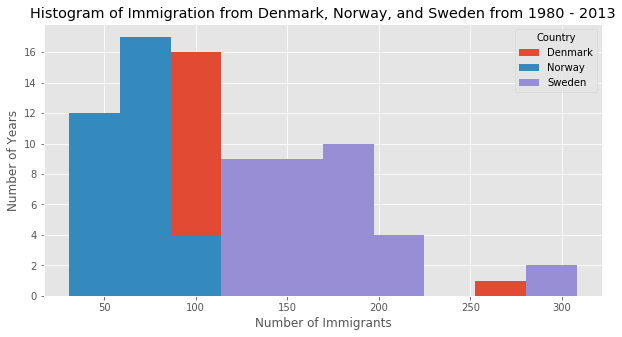

In [55]:
df_t.plot(kind="hist", figsize = (10,5))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

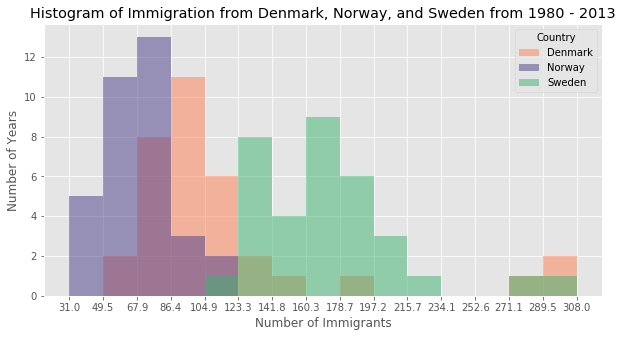

In [56]:
count, bin_edges = np.histogram(df_t, 15)

df_t.plot(kind="hist", 
          figsize = (10,5),
          bins = 15,
          xticks = bin_edges,
          alpha = 0.5,
          color = ["coral", "darkslateblue", "mediumseagreen"])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

## Bar Charts

In [57]:
df_iceland =df_can.loc["Iceland", years]

In [58]:
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

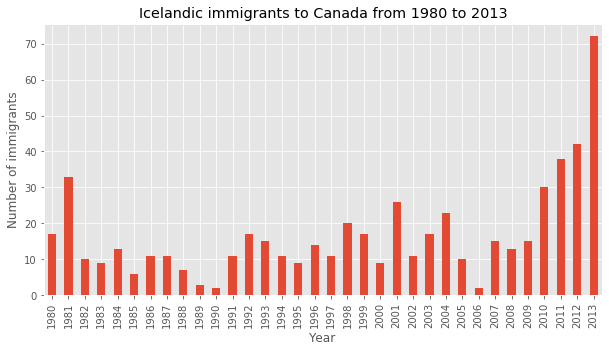

In [59]:
df_iceland.plot(kind="bar",
                figsize =(10,5))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

Text(28, 20, '')

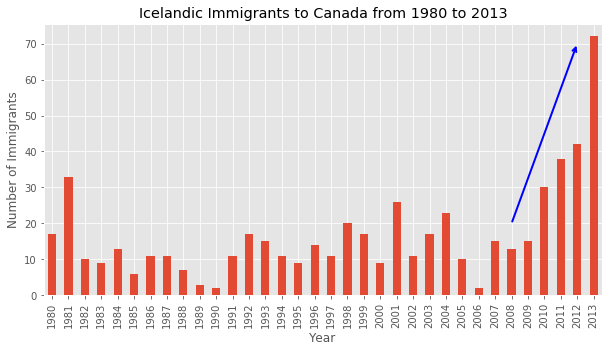

In [60]:
df_iceland.plot(kind='bar', 
                figsize=(10, 5)) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )


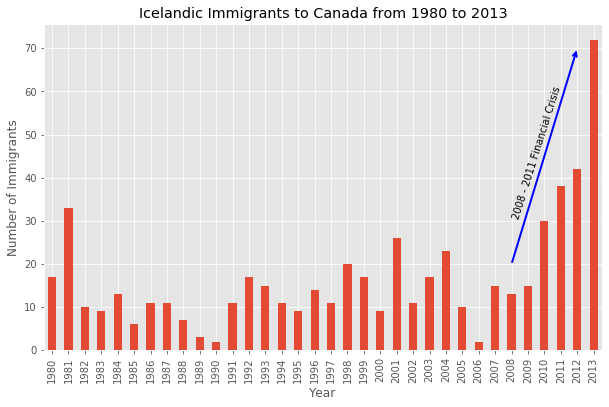

In [61]:
df_iceland.plot(kind='bar', figsize=(10, 6)) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

### Horizontal Bar Plot

In [62]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [63]:
df_top15 = df_can["Total"].head(15)

In [64]:
df_top15

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

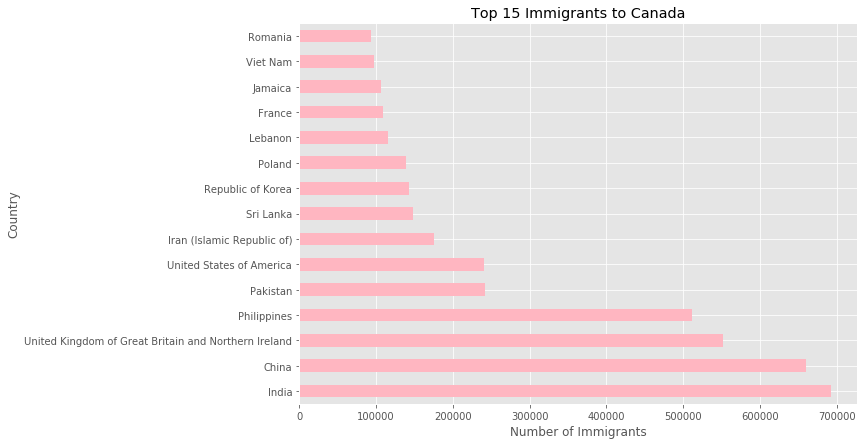

In [65]:
df_top15.plot(kind="barh",
              figsize = (10,7),
              color = "lightpink")

plt.title("Top 15 Immigrants to Canada")
plt.xlabel("Number of Immigrants")

plt.show()

## Pie Charts

In [66]:
df_continents = df_can.groupby("Continent", axis=0).sum()
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


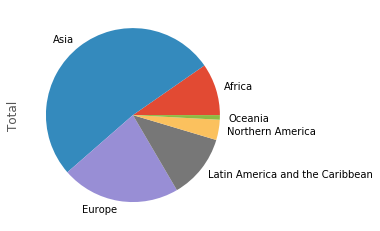

In [67]:
df_continents["Total"].plot(kind="pie")

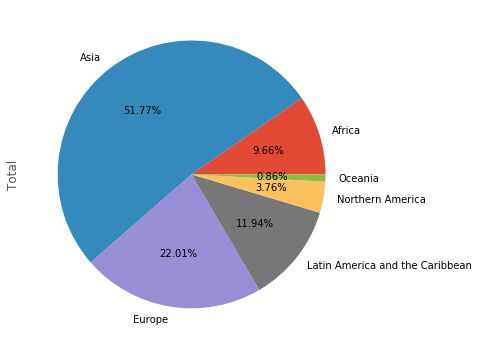

In [68]:
df_continents["Total"].plot(kind="pie",
                            figsize = (6,12),
                            autopct="%1.2f%%")

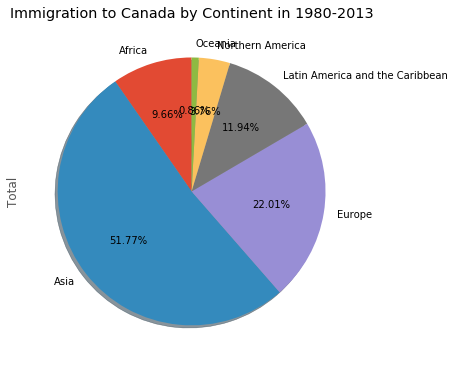

In [69]:
df_continents["Total"].plot(kind="pie",
                            figsize = (6,12),
                            autopct="%1.2f%%",
                            startangle = 90,
                            shadow = True)

plt.title("Immigration to Canada by Continent in 1980-2013")

plt.show()

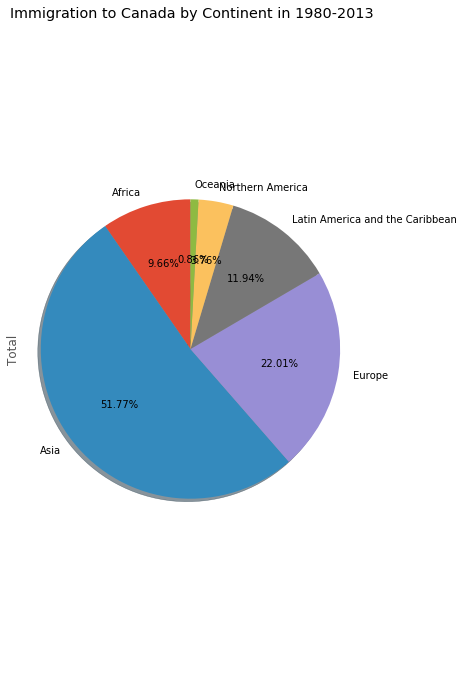

In [70]:
df_continents["Total"].plot(kind="pie",
                            figsize = (6,12),
                            autopct="%1.2f%%",
                            startangle = 90,
                            shadow = True)

plt.title("Immigration to Canada by Continent in 1980-2013")
plt.axis("equal")

plt.show()

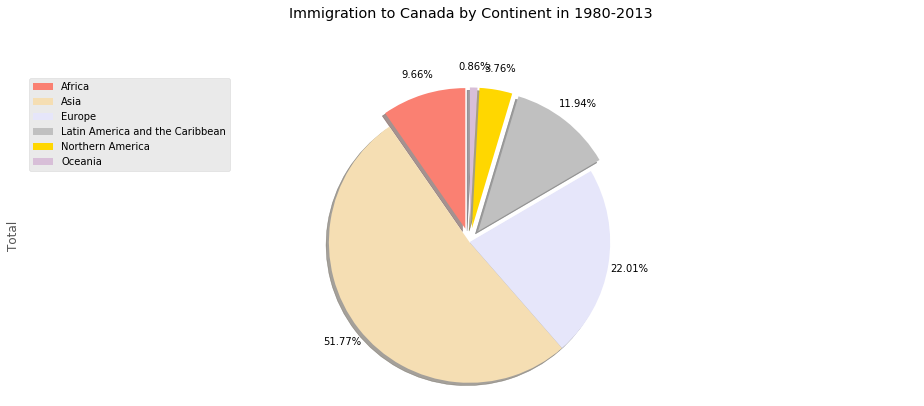

In [71]:
color_list = ["salmon", "wheat", "lavender", "silver", "gold", "thistle"]
explode_list = [0.1, 0, 0, 0.1, 0.1, 0.1]

df_continents["Total"].plot(kind="pie",
                            figsize = (16, 6),
                            autopct="%1.2f%%",
                            startangle = 90,
                            shadow = True,
                            colors = color_list,
                            explode = explode_list,
                            labels = None,   # turn off labels on pie chart
                            pctdistance = 1.15)  # the ratio between the center of each pie slice and the start 
                                                 #  of the text generated by autopct 

plt.title("Immigration to Canada by Continent in 1980-2013", y=1.15)
plt.axis("equal")

plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

## Box Plots

In [72]:
df_japan = df_can.loc["Japan", years].transpose()

In [73]:
df_japan.head()

1980    701
1981    756
1982    598
1983    309
1984    246
Name: Japan, dtype: object

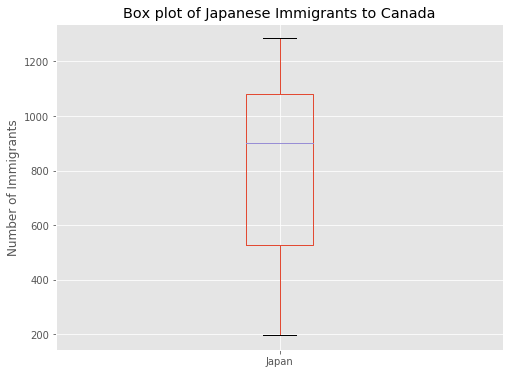

In [74]:
df_japan.plot(kind="box", figsize=(8,6))

plt.title("Box plot of Japanese Immigrants to Canada")
plt.ylabel("Number of Immigrants")

plt.show()

In [75]:
df_japan.describe()

count       34
unique      34
top       1214
freq         1
Name: Japan, dtype: int64

In [76]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


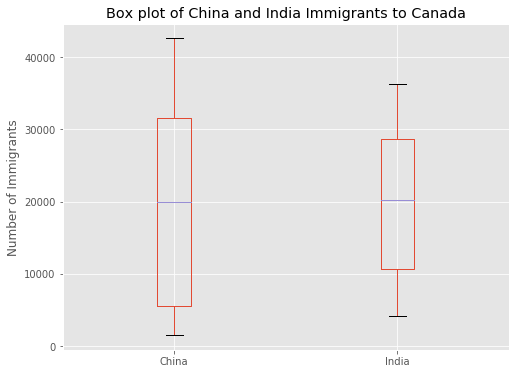

In [78]:
df_CI.plot(kind='box', figsize=(8,6))

plt.title("Box plot of China and India Immigrants to Canada")
plt.ylabel("Number of Immigrants")

plt.show()

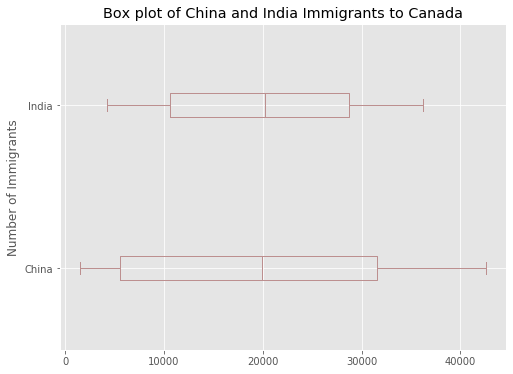

In [80]:
df_CI.plot(kind='box', 
           figsize=(8,6),
           color = "rosybrown",
           vert = False)

plt.title("Box plot of China and India Immigrants to Canada")
plt.ylabel("Number of Immigrants")

plt.show()

## Sobplots

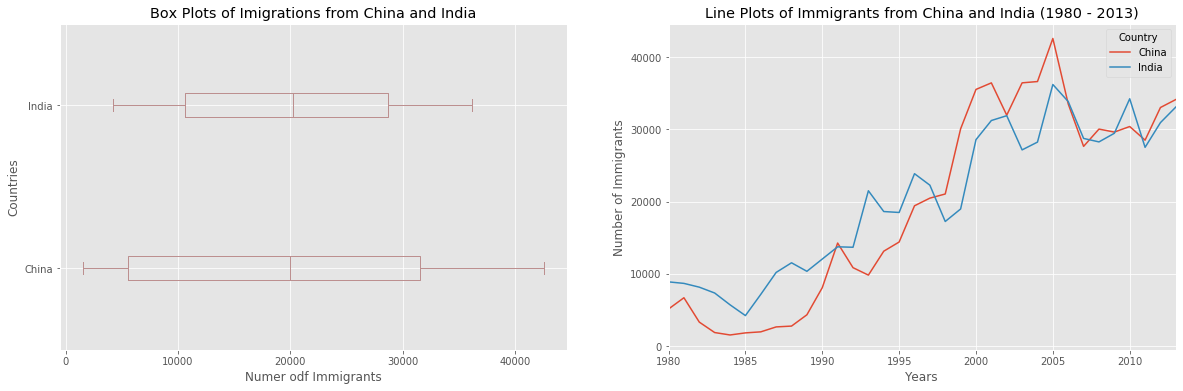

In [84]:
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

#First Plot
df_CI.plot(kind="box", color="rosybrown", vert = False, figsize = (20,6), ax=ax0)
ax0.set_title("Box Plots of Imigrations from China and India")
ax0.set_xlabel("Numer odf Immigrants")
ax0.set_ylabel("Countries")

#Second Plot
df_CI.plot(kind="line", figsize=(20, 6), ax=ax1)
ax1.set_title ("Line Plots of Immigrants from China and India (1980 - 2013)")
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

## Scatter Plots

In [91]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ["years", "total"]

In [92]:
df_tot.head()

,years,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


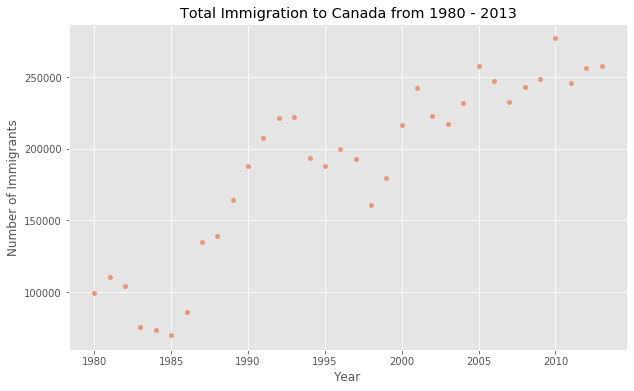

In [96]:
df_tot.plot(kind="scatter", x="years", y="total", figsize=(10, 6), color="darksalmon")

plt.title("Total Immigration to Canada from 1980 - 2013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

plt.show()